In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 70)
pd.set_option('display.max_columns', 200)

In [3]:
df=pd.read_csv('used_cars_data.csv', low_memory=False)

## For modeling, select the required lines

In [4]:
df = df.loc[:, [
    'body_type', 'city_fuel_economy', 'highway_fuel_economy', 
    'exterior_color', 'frame_damaged', 'has_accidents', 
    'salvage', 'fuel_tank_volume', 'fuel_type', 'engine_type', 
    'horsepower', 'isCab', 'major_options','make_name', 'maximum_seating', 
    'mileage', 'model_name', 'seller_rating', 'torque', 'price', 
    'transmission', 'wheel_system', 'year'
]].copy()
df

,body_type,city_fuel_economy,highway_fuel_economy,exterior_color,frame_damaged,has_accidents,salvage,fuel_tank_volume,fuel_type,engine_type,horsepower,isCab,major_options,make_name,maximum_seating,mileage,model_name,seller_rating,torque,price,transmission,wheel_system,year
0,SUV / Crossover,NaN,NaN,Solar Yellow,NaN,NaN,NaN,12.7 gal,Gasoline,I4,177.0,NaN,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,2.800000,"200 lb-ft @ 1,750 RPM",23141.0,A,FWD,2019
1,SUV / Crossover,NaN,NaN,Narvik Black,NaN,NaN,NaN,17.7 gal,Gasoline,I4,246.0,NaN,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,3.000000,"269 lb-ft @ 1,400 RPM",46500.0,A,AWD,2020
2,Sedan,17.0,23.0,None,False,False,False,15.9 gal,Gasoline,H4,305.0,False,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,NaN,"290 lb-ft @ 4,000 RPM",46995.0,M,AWD,2016
3,SUV / Crossover,NaN,NaN,Eiger Gray,NaN,NaN,NaN,23.5 gal,Gasoline,V6,340.0,NaN,NaN,Land Rover,7 seats,11.0,Discovery,3.000000,"332 lb-ft @ 3,500 RPM",67430.0,A,AWD,2020
4,SUV / Crossover,NaN,NaN,Narvik Black,NaN,NaN,NaN,17.7 gal,Gasoline,I4,246.0,NaN,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,3.000000,"269 lb-ft @ 1,400 RPM",48880.0,A,AWD,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,SUV / Crossover,26.0,32.0,Silver,False,False,False,14.9 gal,Gasoline,I4,170.0,True,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Chevrolet,5 seats,41897.0,Equinox,4.272727,NaN,17998.0,A,FWD,2018
3000036,SUV / Crossover,18.0,27.0,Mosaic Black Metallic,NaN,NaN,NaN,19.4 gal,Gasoline,V6,310.0,NaN,"['Alloy Wheels', 'Third Row Seating', 'Bluetoo...",Chevrolet,8 seats,5.0,Traverse,4.533333,"266 lb-ft @ 2,800 RPM",36490.0,A,FWD,2020
3000037,Sedan,NaN,NaN,Gray,False,True,False,16.5 gal,NaN,NaN,240.0,False,"['Alloy Wheels', 'Bluetooth', 'Backup Camera']",Ford,5 seats,57992.0,Fusion,4.142857,"270 lb-ft @ 1,750 RPM",12990.0,A,FWD,2016
3000038,Sedan,30.0,40.0,Green,False,False,False,14.8 gal,Diesel,I4 Diesel,180.0,False,"['Sunroof/Moonroof', 'Navigation System', 'All...",Jaguar,5 seats,27857.0,XE,4.272727,"318 lb-ft @ 1,750 RPM",26998.0,A,AWD,2017


## Data Cleaning & Data Wrangling

## Duplicates

checking for duplicate rows

In [5]:
# checking for duplicate rows
duplucate_rows = df.duplicated().sum()

print(f"The number of duplicate rows are {duplucate_rows}.")

The number of duplicate rows are 148132.


In [6]:
# setting the duplicated index
duplicate_index = df.duplicated(keep=False)

# calling the duplicated index in a dataframe
df.loc[duplicate_index, :].sort_index()

,body_type,city_fuel_economy,highway_fuel_economy,exterior_color,frame_damaged,has_accidents,salvage,fuel_tank_volume,fuel_type,engine_type,horsepower,isCab,major_options,make_name,maximum_seating,mileage,model_name,seller_rating,torque,price,transmission,wheel_system,year
202,SUV / Crossover,NaN,NaN,Snowflake White Pearl Mica,NaN,NaN,NaN,19 gal,Gasoline,I4,250.0,NaN,"['Adaptive Cruise Control', 'Alloy Wheels', 'B...",Mazda,7 seats,10.0,CX-9,2.800000,"320 lb-ft @ 2,500 RPM",39695.0,A,FWD,2020
210,SUV / Crossover,NaN,NaN,Snowflake White Pearl Mica,NaN,NaN,NaN,19 gal,Gasoline,I4,250.0,NaN,"['Adaptive Cruise Control', 'Alloy Wheels', 'B...",Mazda,7 seats,10.0,CX-9,2.800000,"320 lb-ft @ 2,500 RPM",39695.0,A,FWD,2020
612,SUV / Crossover,22.0,30.0,Granite Crystal Metallic Clearcoat,NaN,NaN,NaN,13.5 gal,Gasoline,I4,180.0,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Jeep,5 seats,0.0,Compass,4.377778,"175 lb-ft @ 3,900 RPM",26329.0,A,4WD,2021
629,SUV / Crossover,22.0,30.0,Granite Crystal Metallic Clearcoat,NaN,NaN,NaN,13.5 gal,Gasoline,I4,180.0,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Jeep,5 seats,0.0,Compass,4.377778,"175 lb-ft @ 3,900 RPM",26329.0,A,4WD,2021
642,SUV / Crossover,22.0,30.0,Jazz Blue Pearlcoat,NaN,NaN,NaN,13.5 gal,Gasoline,I4,180.0,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Jeep,5 seats,0.0,Compass,4.377778,"175 lb-ft @ 3,900 RPM",26329.0,A,4WD,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999122,Pickup Truck,NaN,NaN,Summit White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Steel Wheels', 'Bluetooth']",GMC,NaN,0.0,Sierra 2500HD,4.555556,NaN,50850.0,A,NaN,2020
2999134,Pickup Truck,16.0,22.0,Black,NaN,NaN,NaN,24 gal,Gasoline,V8,420.0,NaN,NaN,Chevrolet,6 seats,0.0,Silverado 1500,4.446429,"383 lb-ft @ 4,100 RPM",49500.0,A,4WD,2020
2999192,Pickup Truck,16.0,22.0,Satin Steel Metallic,NaN,NaN,NaN,24 gal,Gasoline,V8,420.0,NaN,NaN,Chevrolet,6 seats,0.0,Silverado 1500,4.446429,"383 lb-ft @ 4,100 RPM",49500.0,A,4WD,2020
2999488,Pickup Truck,NaN,NaN,Oxford White,NaN,NaN,NaN,34 gal,NaN,NaN,430.0,NaN,"['Steel Wheels', 'Backup Camera']",Ford,3 seats,NaN,F-250 Super Duty,5.000000,"430 lb-ft @ 3,800 RPM",37875.0,A,4X2,2020


In [7]:
# making a copy with the duplicated rows dropped
df2 = df.drop_duplicates().copy()

# checking for duplicate rows in the new dataframe
dup = df2.duplicated().sum()

print(f"The number of duplicate rows are {dup}.")

The number of duplicate rows are 0.


## Null Values

In [8]:
# checking for the total amount of null values
df2.isnull().sum()

body_type                 12436
city_fuel_economy        467402
highway_fuel_economy     467402
exterior_color               26
frame_damaged           1281177
has_accidents           1281177
salvage                 1281177
fuel_tank_volume         149994
fuel_type                 77925
engine_type               94761
horsepower               162215
isCab                   1281177
major_options            183948
make_name                     0
maximum_seating          149994
mileage                  124976
model_name                    0
seller_rating             39739
torque                   487853
price                         0
transmission              59617
wheel_system             137779
year                          0
dtype: int64

## body_type

In [9]:
df2['body_type'].unique()

array(['SUV / Crossover', 'Sedan', 'Coupe', 'Hatchback', 'Pickup Truck',
       'Wagon', 'Minivan', 'Van', 'Convertible', nan], dtype=object)

In [10]:
df2['body_type'].value_counts()/df2['body_type'].shape*100

SUV / Crossover    46.962630
Sedan              24.590450
Pickup Truck       16.060792
Hatchback           2.958265
Minivan             2.702752
Coupe               2.489947
Van                 1.496367
Wagon               1.393067
Convertible         0.909672
Name: body_type, dtype: float64

In [11]:
df2['body_type'].replace(np.nan, 'SUV / Crossover', inplace=True)

In [12]:
result = df2['body_type'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the body_type column are {result.round(2)}%.")

The amount of null values in the body_type column are 0.0%.


## city_fuel_economy

In [13]:
# replacing null values with the mean of the column
df2['city_fuel_economy'].replace(np.nan, df2['city_fuel_economy'].mean(), inplace=True)

# Null check
result = df2['city_fuel_economy'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the city_fuel_economy column are {result.round(2)}%.")

The amount of null values in the city_fuel_economy column are 0.0%.


## highway_fuel_economy

In [14]:
# filling the null values with the mean of the column
df2['highway_fuel_economy'].fillna(df2['highway_fuel_economy'].mean(), inplace=True)

# checking the result
result = df2['highway_fuel_economy'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the highway_fuel_economy column are {result.round(2)}%.")

The amount of null values in the highway_fuel_economy column are 0.0%.


In [15]:
# combining the city and highway fuel economy columns into a combined fuel economy column
df2['combined_fuel_economy'] = (df2['city_fuel_economy'] + df2['highway_fuel_economy'])/2 

# dropping the city and highway fuel economy columns
df2.drop(['city_fuel_economy','highway_fuel_economy'], axis=1, inplace=True)

# checking the head of the dataframe
df2.head()

,body_type,exterior_color,frame_damaged,has_accidents,salvage,fuel_tank_volume,fuel_type,engine_type,horsepower,isCab,major_options,make_name,maximum_seating,mileage,model_name,seller_rating,torque,price,transmission,wheel_system,year,combined_fuel_economy
0,SUV / Crossover,Solar Yellow,NaN,NaN,NaN,12.7 gal,Gasoline,I4,177.0,NaN,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,2.8,"200 lb-ft @ 1,750 RPM",23141.0,A,FWD,2019,25.945626
1,SUV / Crossover,Narvik Black,NaN,NaN,NaN,17.7 gal,Gasoline,I4,246.0,NaN,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,3.0,"269 lb-ft @ 1,400 RPM",46500.0,A,AWD,2020,25.945626
2,Sedan,None,False,False,False,15.9 gal,Gasoline,H4,305.0,False,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,NaN,"290 lb-ft @ 4,000 RPM",46995.0,M,AWD,2016,20.000000
3,SUV / Crossover,Eiger Gray,NaN,NaN,NaN,23.5 gal,Gasoline,V6,340.0,NaN,NaN,Land Rover,7 seats,11.0,Discovery,3.0,"332 lb-ft @ 3,500 RPM",67430.0,A,AWD,2020,25.945626
4,SUV / Crossover,Narvik Black,NaN,NaN,NaN,17.7 gal,Gasoline,I4,246.0,NaN,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,3.0,"269 lb-ft @ 1,400 RPM",48880.0,A,AWD,2020,25.945626


In [16]:
# inspecting the mean, median, and mode of the combined fuel economy column
print(f"The mean of the combined fuel economy column is {round(df2['combined_fuel_economy'].mean(), 2)} mpg.")

The mean of the combined fuel economy column is 25.95 mpg.


## exterior_color

In [18]:
# checking how many null values are in the column
percentage = df2['exterior_color'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {percentage}%.")

The amount of null values in the exterior_color column are 0.000911670362438059%.


In [19]:
# checking the value counts of the column.
df2['exterior_color'].value_counts()/df2.shape[0]*100

Black                                     5.573918
White                                     4.361501
Summit White                              3.047854
Silver                                    2.719618
Gray                                      2.666811
                                            ...   
Silver Ice Metallicsilver Ice Metallic    0.000035
Cypress Pearl Green                       0.000035
Red Candy Tinted                          0.000035
Matte Blu Mediterraneo                    0.000035
Cosmic                                    0.000035
Name: exterior_color, Length: 28665, dtype: float64

The findings indicate a lack of consistency in color names. Numerous non-standard colors that do not contribute to our analysis are present. It would be beneficial to categorize these colors into a few groups. Additionally, it is observed that certain vehicles have multiple colors listed. To address this, we can separate these vehicles into multiple rows, ensuring that each row corresponds to a single color.

Firstly, let's address missing values by filling them with the most frequently occurring color.

In [20]:
# replacing null values with Black.
df2['exterior_color'].fillna("Black", inplace=True)

# checking result
result = df2['exterior_color'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {result.round(2)}%.")

The amount of null values in the exterior_color column are 0.0%.


Following that, we can tackle the extensive number of categories in the "exterior_color" column. A surplus of categories in this column may lead to redundant information. Therefore, let's reorganize the "exterior_color" column.

Тhe most prevalent exterior colors in America for 2022 are ranked as follows: White, Black, Gray, Silver, Red, Blue, Brown,Green, Beige, Orange, Gold, Yellow, Purple.

In [21]:
# making a list of the top exterior colors
colors = ['White', 'Black', 'Gray', 'Silver',
          'Red', 'Blue', 'Brown', 'Green', 'Beige',
          'Orange', 'Gold', 'Yellow', 'Purple']

# extracting the top exterior colors from the exterior_color column
df2['exterior_color'] = df2['exterior_color'].str.findall('|'.join(colors)).apply(set).str.join(', ')

In [22]:
# checking the results
df2['exterior_color'].value_counts()/df2.shape[0]*100

                     24.625900
White                20.756700
Black                17.931504
Silver               11.452193
Blue                  7.859019
                       ...    
Silver, Orange        0.000035
Blue, Brown           0.000035
Gray, Yellow          0.000035
Blue, Purple          0.000035
Blue, Gold, White     0.000035
Name: exterior_color, Length: 81, dtype: float64

In [23]:
# checking the number of unique values in the exterior_color column
df2['exterior_color'].nunique()

81

In [25]:
# replacing null values with 'Other Color'.
df2['exterior_color'].replace("", "Other Color", inplace=True)

# masking rows with more than one color
mask = df2['exterior_color'].map(df2['exterior_color'].value_counts()) < 4424

# labeling the rows with more than one color as 'Mixed Colors'
df2['exterior_color'] =  df2['exterior_color'].mask(mask, 'Mixed Colors')

# checking the new unique values in the exterior_color_new column
df2['exterior_color'].value_counts()/df2.shape[0]*100

Other Color     24.625900
White           20.756700
Black           17.931504
Silver          11.452193
Blue             7.859019
Red              7.593548
Gray             7.303006
Green            0.704511
Mixed Colors     0.574668
Brown            0.383147
Orange           0.356673
Gold             0.303306
Beige            0.155826
Name: exterior_color, dtype: float64

## frame_damaged

In [26]:
# checking how many null values are in the column
percentage = df2['frame_damaged'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {percentage}%.")

The amount of null values in the exterior_color column are 44.92350384374251%.


In [27]:
# replacing null values with Black.
df2['frame_damaged'].fillna("", inplace=True)

# checking result
result = df2['frame_damaged'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {result.round(2)}%.")

The amount of null values in the exterior_color column are 0.0%.


## has_accidents

In [28]:
# checking how many null values are in the column
percentage = df2['has_accidents'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {percentage}%.")

The amount of null values in the exterior_color column are 44.92350384374251%.


In [29]:
# replacing null values with Black.
df2['has_accidents'].fillna("", inplace=True)

# checking result
result = df2['has_accidents'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {result.round(2)}%.")

The amount of null values in the exterior_color column are 0.0%.


## salvage


In [30]:
# checking how many null values are in the column
percentage = df2['salvage'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {percentage}%.")

The amount of null values in the exterior_color column are 44.92350384374251%.


In [31]:
# replacing null values with Black.
df2['salvage'].fillna("", inplace=True)

# checking result
result = df2['salvage'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {result.round(2)}%.")

The amount of null values in the exterior_color column are 0.0%.


## fuel_tank_volume

In [32]:
# checking the value counts of the column.
df2['fuel_tank_volume'].value_counts()/df2.shape[0]*100

26 gal      6.978205
13.2 gal    5.383238
18.5 gal    4.961170
14 gal      4.273455
14.5 gal    3.210482
              ...   
25.5 gal    0.000070
25.2 gal    0.000070
40.7 gal    0.000035
23.1 gal    0.000035
26.3 gal    0.000035
Name: fuel_tank_volume, Length: 182, dtype: float64

In [33]:
# filtering the rows that the fuel_type column is "Electric", with the fuel_tank_volume column.
df2.loc[(df2['fuel_type'] == "Electric"), ['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
274,NaN,Electric
1182,NaN,Electric
1721,NaN,Electric
1729,NaN,Electric
2351,NaN,Electric
...,...,...
2999820,NaN,Electric
2999874,NaN,Electric
2999882,NaN,Electric
2999919,NaN,Electric


In [34]:
# splitting the column and returning the first value
df2['fuel_tank_volume'] = df2['fuel_tank_volume'].str.split(' ').str[0]

# replacing "--" with np.nan
df2['fuel_tank_volume'].replace("--", np.nan , inplace=True)

# converting the fuel_tank_volume column to a float
df2['fuel_tank_volume'] = pd.to_numeric(df2['fuel_tank_volume'], downcast='float')

In [35]:
# filling the null values with the 0 value on electric cars only.
df2.loc[(df2['fuel_type'] == "Electric"), 'fuel_tank_volume'] = 0

# checking the result
result = df2['fuel_tank_volume'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the fuel_tank_volume column are {result.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 4.76%.


In [36]:
# checking the null values rows
df2[df2['fuel_tank_volume'].isna()][['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
50,NaN,NaN
162,NaN,Gasoline
263,NaN,Gasoline
303,NaN,NaN
394,NaN,Gasoline
...,...,...
2999931,NaN,Gasoline
2999974,NaN,Gasoline
2999975,NaN,Gasoline
2999992,NaN,Gasoline


In [37]:
# filling the null values with the mean based on the fuel_type column.
df2['fuel_tank_volume'].fillna(df2.groupby('fuel_type')['fuel_tank_volume'].transform('mean'), inplace=True)

# checking the result
result = df2['fuel_tank_volume'].isna().sum()/df2.shape[0]*100
 
print(f"The amount of null values in the fuel_tank_volume column are {result.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 1.62%.


In [38]:
# checking the null values rows
df2[df2['fuel_tank_volume'].isna()][['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
50,NaN,NaN
303,NaN,NaN
1011,NaN,NaN
1124,NaN,NaN
1284,NaN,NaN
...,...,...
2999045,NaN,NaN
2999047,NaN,NaN
2999112,NaN,NaN
2999125,NaN,NaN


It appears that our initial focus should be on handling the null values in the "fuel_type" column. By addressing this, we can subsequently proceed to fill in the null values in the "fuel_tank_volume" column.

## fuel_type


In [39]:
# checking the value counts of the column.
df2['fuel_type'].value_counts()/df2.shape[0]*100

Gasoline                  86.514291
Flex Fuel Vehicle          5.292001
Hybrid                     2.516876
Diesel                     1.515371
Biodiesel                  0.878184
Electric                   0.545670
Compressed Natural Gas     0.005014
Propane                    0.000210
Name: fuel_type, dtype: float64

In [40]:
# checking the null values rows
df2[df2['fuel_type'].isna()][['fuel_type','fuel_tank_volume','make_name','model_name']]

,fuel_type,fuel_tank_volume,make_name,model_name
42,NaN,12.7,Jeep,Renegade
50,NaN,NaN,Subaru,Impreza
61,NaN,16.9,Chrysler,200
112,NaN,24.6,Jeep,Grand Cherokee
217,NaN,26.0,RAM,1500
...,...,...,...,...
2999488,NaN,34.0,Ford,F-250 Super Duty
2999491,NaN,48.0,Ford,F-350 Super Duty
2999603,NaN,48.0,Ford,F-250 Super Duty
2999787,NaN,13.2,Nissan,Sentra


In [41]:
# filling the null values with "Gasoline".
df2['fuel_type'].fillna("Gasoline", inplace=True)

# checking the result
percentage = df2['fuel_type'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the fuel_type column are {percentage.round(2)}%.")

The amount of null values in the fuel_type column are 0.0%.


Now that the null values have been filled in, lets go back to the fuel_tank_volume column and see if we can fill in the rest of the null values.

In [42]:
# checking the null values rows in the fuel_tank_volume column
df2[df2['fuel_tank_volume'].isna()][['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
50,NaN,Gasoline
303,NaN,Gasoline
1011,NaN,Gasoline
1124,NaN,Gasoline
1284,NaN,Gasoline
...,...,...
2999045,NaN,Gasoline
2999047,NaN,Gasoline
2999112,NaN,Gasoline
2999125,NaN,Gasoline


In [43]:
# filling the null values with the mean based on the fuel_tank_volume column.
df2['fuel_tank_volume'].fillna(df2.groupby('fuel_type')['fuel_tank_volume'].transform('mean'), inplace=True)

# checking the result
percentage = df2['fuel_tank_volume'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the fuel_tank_volume column are {percentage.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 0.0%.


## engine_type

In [44]:
# checking the unique values in the engine_type column
df2['engine_type'].unique()

array(['I4', 'H4', 'V6', 'I6', 'V6 Diesel', nan, 'V8', 'V8 Biodiesel',
       'V8 Flex Fuel Vehicle', 'V6 Flex Fuel Vehicle', 'I4 Hybrid',
       'V6 Hybrid', 'I3', 'I5', 'I4 Flex Fuel Vehicle', 'I4 Diesel',
       'I6 Diesel', 'V8 Diesel', 'R2', 'W12', 'V10', 'V12',
       'V6 Biodiesel', 'H6', 'I2', 'W12 Flex Fuel Vehicle',
       'I5 Biodiesel', 'V8 Hybrid', 'H4 Hybrid',
       'V8 Compressed Natural Gas', 'I6 Hybrid', 'I5 Diesel', 'W8',
       'I4 Compressed Natural Gas', 'V10 Diesel', 'W16', 'V8 Propane',
       'I3 Hybrid', 'V6 Compressed Natural Gas', 'V12 Hybrid'],
      dtype=object)

In [45]:
# checking the value counts of the column.
df2['engine_type'].value_counts()/df2.shape[0]*1

I4                           4.638179e-01
V6                           2.506049e-01
V8                           9.546276e-02
V8 Flex Fuel Vehicle         2.680732e-02
I4 Hybrid                    2.403759e-02
V6 Flex Fuel Vehicle         2.285803e-02
H4                           2.226509e-02
I3                           1.801881e-02
I6                           9.876546e-03
I6 Diesel                    7.952220e-03
V8 Biodiesel                 7.514268e-03
I4 Flex Fuel Vehicle         3.220651e-03
I4 Diesel                    2.519015e-03
V8 Diesel                    2.197126e-03
V6 Diesel                    2.195372e-03
I5                           1.858405e-03
H6                           1.643111e-03
V6 Biodiesel                 1.234612e-03
V6 Hybrid                    1.046317e-03
V12                          4.610948e-04
V10                          4.512768e-04
I2                           3.141756e-04
W12                          1.697109e-04
V8 Hybrid                    4.453

In [46]:
# selecting the first string in the engine_type column
df2['engine_type'] = df2['engine_type'].str.split(' ').str[0]

# checking the unique values in the engine_type column
df2['engine_type'].unique()

array(['I4', 'H4', 'V6', 'I6', nan, 'V8', 'I3', 'I5', 'R2', 'W12', 'V10',
       'V12', 'H6', 'I2', 'W8', 'W16'], dtype=object)

In [47]:
# looking at the null rows
df2.loc[df2['engine_type'].isna(),['make_name','model_name','engine_type', 'fuel_type']]

,make_name,model_name,engine_type,fuel_type
42,Jeep,Renegade,NaN,Gasoline
50,Subaru,Impreza,NaN,Gasoline
61,Chrysler,200,NaN,Gasoline
112,Jeep,Grand Cherokee,NaN,Gasoline
217,RAM,1500,NaN,Gasoline
...,...,...,...,...
2999874,Chevrolet,Bolt EV,NaN,Electric
2999882,Chevrolet,Bolt EV,NaN,Electric
2999919,Nissan,LEAF,NaN,Electric
2999949,Nissan,LEAF,NaN,Electric


It appears that the null values represent a combination of electric and gas vehicles. Let's begin by examining the electric vehicles.

In [48]:
# looking at the null rows that the fuel_type column is "Electric"
df2.loc[(df2['engine_type'].isna()) & (df2['fuel_type'] == "Electric"),['make_name','model_name','engine_type', 'fuel_type']]

,make_name,model_name,engine_type,fuel_type
274,Kia,Soul EV,NaN,Electric
1182,Kia,Niro EV,NaN,Electric
1721,Chevrolet,Bolt EV,NaN,Electric
1729,Chevrolet,Bolt EV,NaN,Electric
2351,Hyundai,Ioniq Electric,NaN,Electric
...,...,...,...,...
2999820,Chevrolet,Bolt EV,NaN,Electric
2999874,Chevrolet,Bolt EV,NaN,Electric
2999882,Chevrolet,Bolt EV,NaN,Electric
2999919,Nissan,LEAF,NaN,Electric


In [49]:
# filling the null values with the fuel_type "Electric" with the "Electric Motor" value.
df2.loc[(df2['engine_type'].isna()) & (df2['fuel_type'] == "Electric"), 'engine_type'] = "Electric Motor"

In [51]:
# filling the null values with the fuel_type "Gasoline" with the "I4" value.
df2.loc[(df2['engine_type'].isna()) & (df2['fuel_type'] == "Gasoline"), 'engine_type'] = "Gasoline engine"

In [52]:
# checking for nulls
result = df2['engine_type'].isna().sum()/df2.shape[0]*100
 
print(f"The amount of null values in the engine_type column are {result}%.")

The amount of null values in the engine_type column are 0.027209853894305146%.


In [53]:
# checking the null values rows in the engine_type column
df2[df2['engine_type'].isna()][['engine_type','fuel_type']]

,engine_type,fuel_type
7186,NaN,Diesel
7264,NaN,Diesel
8259,NaN,Diesel
10489,NaN,Diesel
10503,NaN,Diesel
...,...,...
2976914,NaN,Diesel
2977375,NaN,Diesel
2977385,NaN,Diesel
2977393,NaN,Diesel


In [54]:
# filling the null values with the fuel_type "Diesel" with the "Diesel" value.
df2.loc[(df2['engine_type'].isna()) & (df2['fuel_type'] == "Diesel"), 'engine_type'] = "Diesel engine"

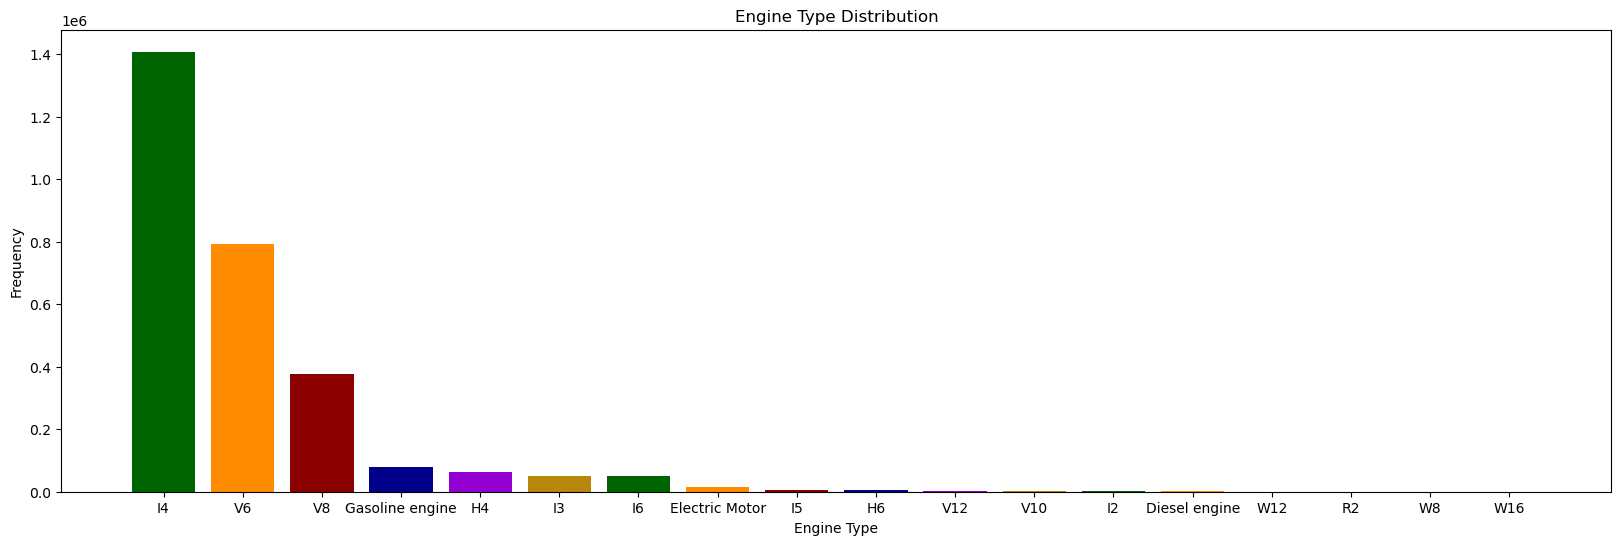

In [55]:
# plotting the distribution of the engine_type column
plt.figure(figsize=(20,6))
plt.bar(df2['engine_type'].value_counts().index, df2['engine_type'].value_counts(),
        color=['darkgreen','darkorange','darkred','darkblue','darkviolet','darkgoldenrod'])
plt.title('Engine Type Distribution')
plt.xlabel('Engine Type')
plt.ylabel('Frequency')
plt.show()

## horsepower

In [56]:
# filling the null values with the most common value
df2['horsepower'].fillna(df2['horsepower'].mode()[0], inplace=True)

# checking the result
percentage = df2['horsepower'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the horsepower column are {percentage.round(2)}%.")

The amount of null values in the horsepower column are 0.0%.


## isCab

In [57]:
# checking how many null values are in the column
percentage = df2['isCab'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {percentage}%.")

The amount of null values in the exterior_color column are 44.92350384374251%.


In [58]:
# replacing null values with Black.
df2['isCab'].fillna("", inplace=True)

# checking result
result = df2['isCab'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {result.round(2)}%.")

The amount of null values in the exterior_color column are 0.0%.


## major_options

In [59]:
# checking the value counts
df2['major_options'].value_counts()/df2.shape[0]*100

['Alloy Wheels', 'Bluetooth', 'Backup Camera']                                                                                                                                                                                                                         3.026465
['Alloy Wheels']                                                                                                                                                                                                                                                       1.441386
['Steel Wheels']                                                                                                                                                                                                                                                       1.421820
['Steel Wheels', 'Bluetooth', 'Backup Camera']                                                                                                                                          

In order to simplify the manipulation of the column, we will convert it into a new column named 'major_options_count'. This new column will represent the count of major options associated with each vehicle.

In [60]:
# creating a major_options_count column to count the number of major options
df2['major_options_count'] = df2['major_options'].str.count(',') + 1
 
# checking the result
df2['major_options_count'].value_counts()

4.0     314470
3.0     298137
5.0     289207
6.0     269046
7.0     238003
8.0     216869
2.0     212030
9.0     177657
1.0     175252
10.0    146120
11.0    112283
12.0     78903
13.0     50739
14.0     31869
15.0     18702
16.0     12520
17.0      7918
18.0      5131
19.0      3510
20.0      2475
21.0      1639
22.0      1272
23.0      1063
24.0       745
25.0       623
26.0       491
27.0       310
28.0       222
29.0       211
30.0       125
31.0        93
32.0        89
33.0        56
34.0        48
35.0        41
36.0        24
38.0        14
37.0        12
39.0         7
40.0         6
45.0         4
41.0         4
44.0         3
48.0         3
53.0         2
49.0         2
52.0         2
50.0         2
43.0         2
42.0         1
59.0         1
57.0         1
47.0         1
Name: major_options_count, dtype: int64

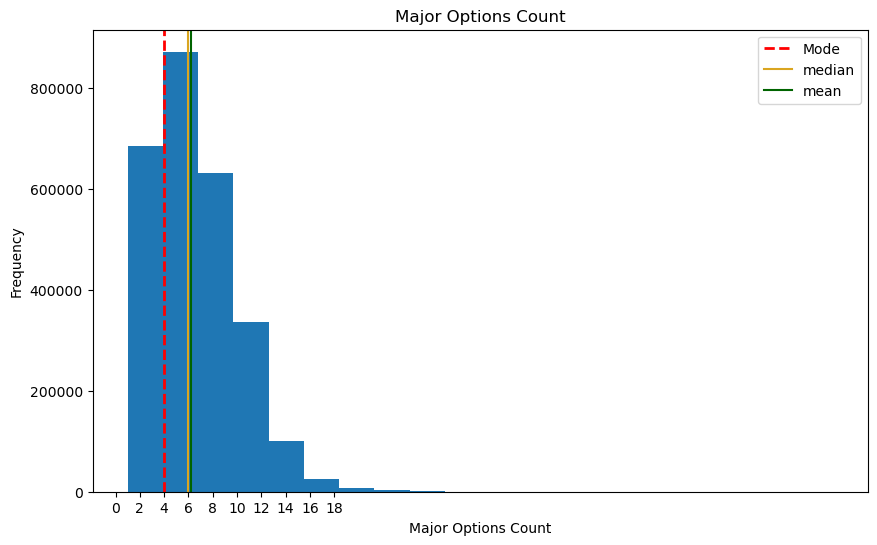

In [61]:
# plotting the distribution of the major_options_count column
plt.figure(figsize=(10,6))
plt.hist(df2['major_options_count'], bins=20)
plt.title('Major Options Count')
# Add the mode
plt.axvline(df2['major_options_count'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(df2['major_options_count'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(df2['major_options_count'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Major Options Count')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 20, 2))
plt.show()

Observing the data, it's evident that a significant portion of vehicles possess between 4 to 6 major options. To address the null values, we can populate them with the mean value of the column

In [62]:
# filling the null values with the mean of the column
df2['major_options_count'].fillna(df2['major_options_count'].mean(), inplace=True)
 
# checking the result
result = df2['major_options_count'].isna().sum()/df2.shape[0]*100
 
print(f"The amount of null values in the major_options_count column are {result.round(2)}%.")

The amount of null values in the major_options_count column are 0.0%.


Drop the major_options column from the dataset as well.

In [63]:
# dropping the major_options column
df2.drop('major_options', axis=1, inplace=True)

## maximum_seating

In [64]:
# checking the value_counts of the column
df2['maximum_seating'].value_counts()/df2.shape[0]*100

5 seats     62.016832
7 seats     10.354401
6 seats     10.247035
8 seats      6.787807
4 seats      2.810610
2 seats      1.155893
3 seats      0.946700
15 seats     0.201865
9 seats      0.126933
12 seats     0.057716
10 seats     0.017462
--           0.017322
Name: maximum_seating, dtype: float64

In [65]:
# checking the unique values of the column
df2['maximum_seating'].unique()

array(['5 seats', '7 seats', '2 seats', '4 seats', '8 seats', nan,
       '6 seats', '9 seats', '3 seats', '--', '15 seats', '12 seats',
       '10 seats'], dtype=object)

In [66]:
# replacing the "--" with np.nan
df2['maximum_seating'].replace("--", np.nan , inplace=True)

# filling the null values with a new value called the most frequent value.
df2['maximum_seating'].fillna("5 seats", inplace=True)

# checking the result
result = df2['maximum_seating'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the maximum_seating column are {result.round(2)}%.")

The amount of null values in the maximum_seating column are 0.0%.


In [67]:
# removing the " seats" from the column
df2['maximum_seating'] = df2['maximum_seating'].str.replace(" seats", "")

# converting the column to a int
df2['maximum_seating'] = pd.to_numeric(df2['maximum_seating'], downcast='integer')

# checking the result
df2['maximum_seating'].value_counts()

5     1919151
7      295298
6      292236
8      193582
4       80156
2       32965
3       26999
15       5757
9        3620
12       1646
10        498
Name: maximum_seating, dtype: int64

## mileage

In [68]:
# checking the value counts
df2['mileage'].value_counts()/df2.shape[0]*100

0.0         7.827391
5.0         4.630304
10.0        4.290706
3.0         2.440226
2.0         2.351303
              ...   
137822.0    0.000035
142416.0    0.000035
271567.0    0.000035
163323.0    0.000035
121932.0    0.000035
Name: mileage, Length: 197577, dtype: float64

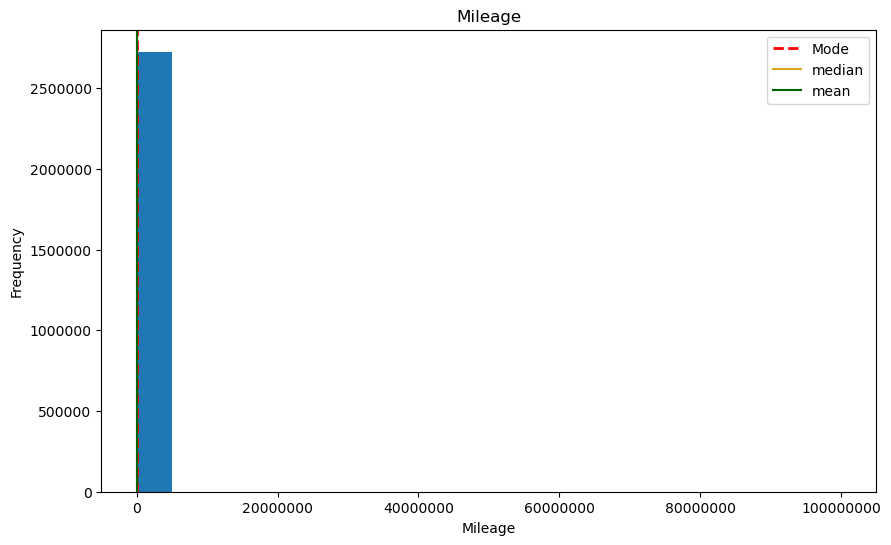

In [69]:
# plotting the mileage column to see the distribution
plt.figure(figsize=(10,6))
plt.hist(df2['mileage'], bins=20)
plt.title('Mileage')
# Add the mode
plt.axvline(df2['mileage'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(df2['mileage'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(df2['mileage'].mean(), color='darkgreen', label='mean')
#removing scientific notation
plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

The chart indicates a substantial number of outliers within the column. Therefore, it's necessary to eliminate these outliers before proceeding to fill the null values with either the mean or median. The interquartile range will be employed for outlier removal.

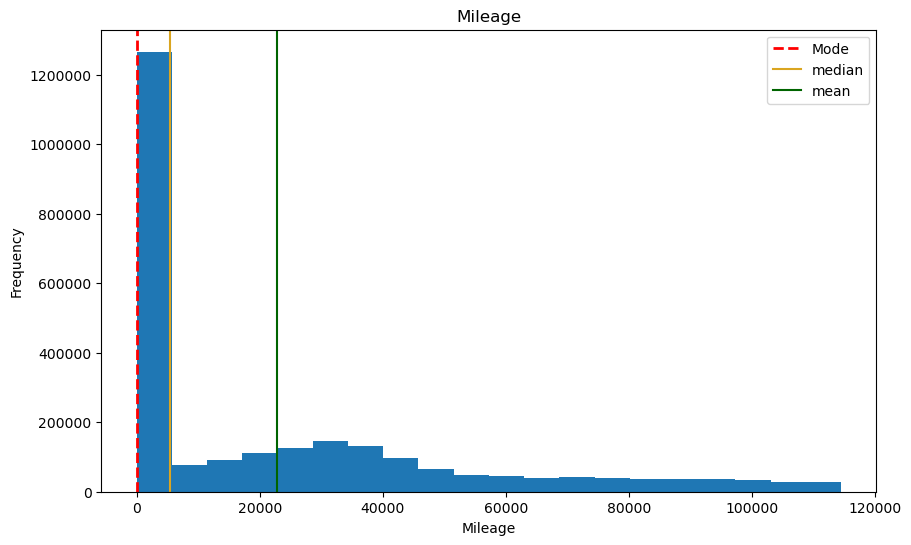

In [70]:
# using the interquartile range to remove outliers
q1 = df2['mileage'].quantile(0.25)
q3 = df2['mileage'].quantile(0.75)

# calculating the interquartile range
iqr = q3 - q1

# removing outliers
df2 = df2[(df2['mileage'] >= q1 - 1.5*iqr) & (df2['mileage'] <= q3 + 1.5*iqr)]

# checking the result
plt.figure(figsize=(10,6))
plt.hist(df2['mileage'], bins=20)
plt.title('Mileage')
# Add the mode
plt.axvline(df2['mileage'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(df2['mileage'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(df2['mileage'].mean(), color='darkgreen', label='mean')
#removing scientific notation
plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

Тhe majority of vehicles have a mileage of 0 miles. This is because the vehicles are new. So in this case, we can fill in the null values with 0.1.

In [72]:
df2 = df2.copy()
# replacing null values with one.
df2['mileage'].fillna(0.1, inplace=True)

# checking result
result = df2['mileage'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {result.round(2)}%.")

The amount of null values in the exterior_color column are 0.0%.


## seller_rating

In [73]:
# checking the value_counts of the column
df2['seller_rating'].value_counts()/df2.shape[0]*100

5.000000    6.168307
4.000000    4.055687
4.500000    3.552464
4.666667    2.088908
4.333333    2.028002
              ...   
3.859649    0.000040
4.163636    0.000040
3.549020    0.000040
3.861111    0.000040
3.971831    0.000040
Name: seller_rating, Length: 1805, dtype: float64

In [74]:
# filling the null values with the most frequent value.
df2['seller_rating'].fillna("5", inplace=True)

# checking the result
result = df2['seller_rating'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the seller_rating column are {result.round(2)}%.")

The amount of null values in the seller_rating column are 0.0%.


## torque

In [75]:
# checking the value_counts of the column
df2['torque'].value_counts()/df2.shape[0]*100

383 lb-ft @ 4,100 RPM    3.131280
400 lb-ft @ 4,500 RPM    2.377376
410 lb-ft @ 3,950 RPM    2.025465
132 lb-ft @ 4,500 RPM    1.788266
148 lb-ft @ 200 RPM      1.760906
                           ...   
280 lb-ft @ 2,700 RPM    0.000040
465 lb-ft @ 5,000 RPM    0.000040
98 lb-ft @ 3,000 RPM     0.000040
160 lb-ft @ 1,600 RPM    0.000040
156 lb-ft @ 4,500 RPM    0.000040
Name: torque, Length: 1942, dtype: float64

In [76]:
# splitting the column and returning the first value
df2['torque'] = df2['torque'].str.split(" ").str[0]

# converting the column to float.
df2['torque'] = df2['torque'].astype(float)

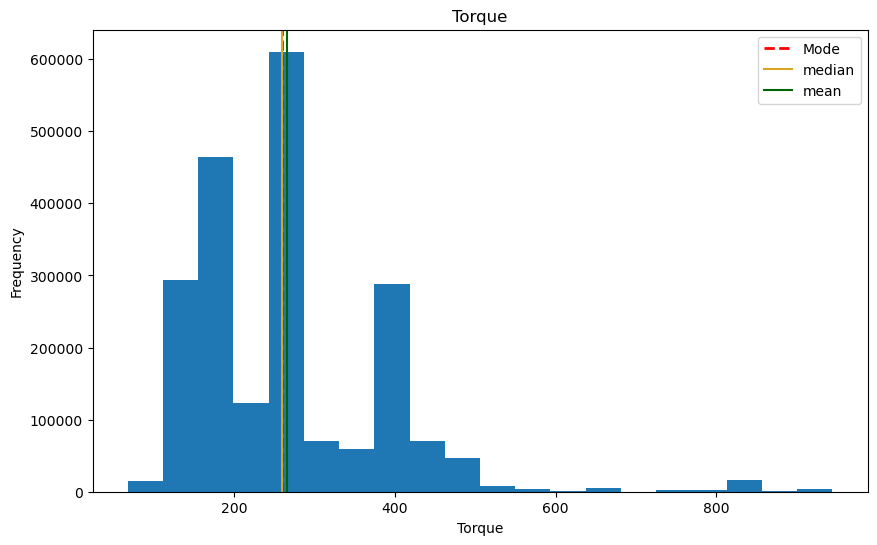

In [77]:
# plotting the distribution of the column
plt.figure(figsize=(10,6))
plt.hist(df2['torque'], bins=20)
plt.title('Torque')
# Add the mode
plt.axvline(df2['torque'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(df2['torque'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(df2['torque'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Torque')
plt.ylabel('Frequency')
plt.show()

In [78]:
# filling the null values with the mean of the column.
df2['torque'].fillna(df2['torque'].mean(), inplace=True)

# checking the result
result = df2['torque'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the torque column are {result.round(2)}%.")

The amount of null values in the torque column are 0.0%.


## transmission

In [79]:
# checking the value_counts of the column
df2['transmission'].value_counts()/df2.shape[0]*100

A              80.987811
CVT            15.049287
M               1.557333
Dual Clutch     0.375742
Name: transmission, dtype: float64

In [80]:
# checking for unique values in the column
df2['transmission'].unique()

array(['A', 'CVT', 'M', nan, 'Dual Clutch'], dtype=object)

In [81]:
# filling the null values with "A", for Automatic transmission.
df2['transmission'].fillna("A", inplace=True)

# checking the result
result = df2['transmission'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the transmission column are {result.round(2)}%.")

The amount of null values in the transmission column are 0.0%.


## wheel_system

In [82]:
# checking the value_counts of the column
df2['wheel_system'].value_counts()/df2.shape[0]*100

FWD    41.643616
AWD    23.879593
4WD    19.448877
RWD     6.400509
4X2     3.958262
Name: wheel_system, dtype: float64

In [83]:
# checking the unique values of the column
df2['wheel_system'].unique()

array(['FWD', 'AWD', 'RWD', '4WD', nan, '4X2'], dtype=object)

In [84]:
# replacing the null values with "FWD".
df2['wheel_system'].fillna("FWD", inplace=True)

# checking the result
result = df2['wheel_system'].isna().sum()/df2.shape[0]*100

print(f"The amount of null values in the wheel_system column are {result.round(2)}%.")

The amount of null values in the wheel_system column are 0.0%.


In [85]:
df2.isnull().sum()

body_type                0
exterior_color           0
frame_damaged            0
has_accidents            0
salvage                  0
fuel_tank_volume         0
fuel_type                0
engine_type              0
horsepower               0
isCab                    0
make_name                0
maximum_seating          0
mileage                  0
model_name               0
seller_rating            0
torque                   0
price                    0
transmission             0
wheel_system             0
year                     0
combined_fuel_economy    0
major_options_count      0
dtype: int64

In [86]:
df2

,body_type,exterior_color,frame_damaged,has_accidents,salvage,fuel_tank_volume,fuel_type,engine_type,horsepower,isCab,make_name,maximum_seating,mileage,model_name,seller_rating,torque,price,transmission,wheel_system,year,combined_fuel_economy,major_options_count
0,SUV / Crossover,Mixed Colors,,,,12.700000,Gasoline,I4,177.0,,Jeep,5,7.0,Renegade,2.8,200.000000,23141.0,A,FWD,2019,25.945626,1.000000
1,SUV / Crossover,Black,,,,17.700001,Gasoline,I4,246.0,,Land Rover,7,8.0,Discovery Sport,3.0,269.000000,46500.0,A,AWD,2020,25.945626,1.000000
3,SUV / Crossover,Gray,,,,23.500000,Gasoline,V6,340.0,,Land Rover,7,11.0,Discovery,3.0,332.000000,67430.0,A,AWD,2020,25.945626,6.205705
4,SUV / Crossover,Black,,,,17.700001,Gasoline,I4,246.0,,Land Rover,7,7.0,Discovery Sport,3.0,269.000000,48880.0,A,AWD,2020,25.945626,1.000000
5,SUV / Crossover,Other Color,False,False,False,16.600000,Gasoline,I4,247.0,False,Land Rover,5,12.0,Range Rover Velar,3.0,269.000000,66903.0,A,AWD,2020,25.945626,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,SUV / Crossover,Silver,False,False,False,14.900000,Gasoline,I4,170.0,True,Chevrolet,5,41897.0,Equinox,4.272727,266.280818,17998.0,A,FWD,2018,29.000000,4.000000
3000036,SUV / Crossover,Black,,,,19.400000,Gasoline,V6,310.0,,Chevrolet,8,5.0,Traverse,4.533333,266.000000,36490.0,A,FWD,2020,22.500000,6.000000
3000037,Sedan,Gray,False,True,False,16.500000,Gasoline,Gasoline engine,240.0,False,Ford,5,57992.0,Fusion,4.142857,270.000000,12990.0,A,FWD,2016,25.945626,3.000000
3000038,Sedan,Green,False,False,False,14.800000,Diesel,I4,180.0,False,Jaguar,5,27857.0,XE,4.272727,318.000000,26998.0,A,AWD,2017,35.000000,5.000000


## Saving the Cleaned Dataset

In [87]:
# saving the dataset
df2.to_csv('df_for_modeling.csv', index=False)